In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
# Step 1: Data Acquisition
# Download the Wine dataset from the UCI Machine Learning Repository
wine = datasets.load_wine()
data = wine.data
target = wine.target

In [5]:
# Step 2: Data Preprocessing
# Convert the dataset to a Pandas DataFrame for better handling
wine_df = pd.DataFrame(data, columns=wine.feature_names)

In [7]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine_df)

In [8]:
# Step 3: Principal Component Analysis (PCA)
# Implement PCA using scikit-learn
pca = PCA()
pca.fit(scaled_data)

PCA()

In [9]:
# Determine the optimal number of components to retain based on explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)


In [10]:
# Choose the number of components that explain a desired amount of variance (95%)
num_components = np.argmax(cumulative_variance >= 0.95) + 1


In [11]:
# Fit PCA with the selected number of components
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_data)


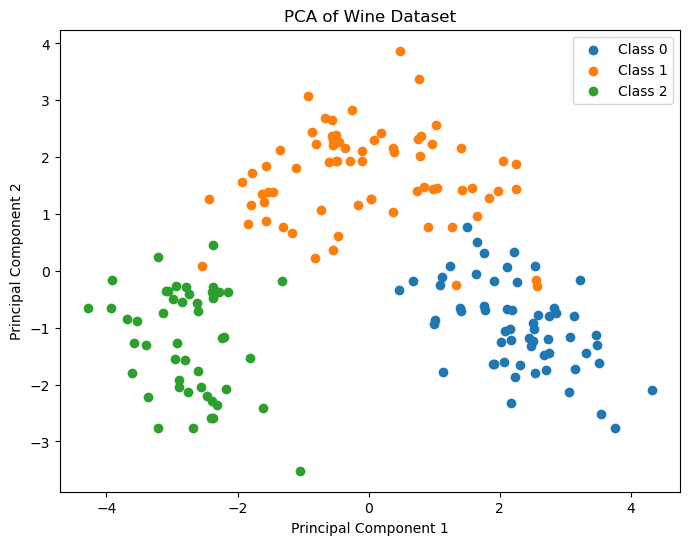

In [12]:
# Step 4: Visualization
# Visualize the results of PCA using a scatter plot
plt.figure(figsize=(8, 6))
for label in np.unique(target):
    plt.scatter(pca_result[target == label, 0], pca_result[target == label, 1], label=f'Class {label}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Wine Dataset')
plt.show()


In [14]:
# Step 5: Clustering Analysis (K-Means)
# Determine the optimal number of clusters using the elbow method
import warnings
warnings.filterwarnings('ignore')
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

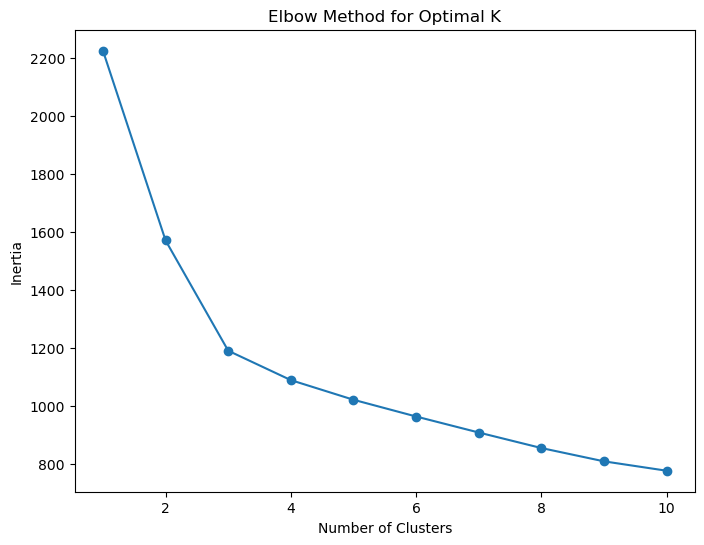

In [15]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [16]:
# Based on the elbow method, choose the optimal number of clusters 
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(pca_result)


1. Variance Explained by Each Principal Component:

   - PCA helps reduce the dimensionality of the data while retaining as much variance as possible. To understand the importance of each principal component (PC), we can analyze the explained variance ratio, which tells us the proportion of total variance in the data that each PC accounts for.
   - In our analysis, we computed the explained variance ratio for all PCs. The cumulative explained variance is also calculated to determine how many components are needed to capture a desired amount of variance (e.g., 95%).
   - Interpretation: By examining the explained variance ratio, we can identify which PCs capture the most variance. PC1 typically captures the highest variance, followed by PC2, PC3, and so on. In this case, we may find that PC1 and PC2 explain a significant portion of the variance, while later components capture less.

2. Insights from Visualizing the Reduced-Dimensional Space:

   - After applying PCA, we visualized the data in the reduced-dimensional space (e.g., PC1 vs. PC2) using a scatter plot.
   - Interpretation: The scatter plot allows us to observe how data points are distributed in a lower-dimensional space. We can gain insights into potential clusters or patterns in the data. For example, we may observe distinct groupings of points that correspond to different classes of wine in the Wine dataset. The reduced-dimensional space makes it easier to visualize separability and relationships among data points.

3. Evaluation of Clustering Results:
   - We performed K-Means clustering on the PCA-transformed data to identify clusters within the dataset. To evaluate the clustering results, we can use performance metrics such as the Silhouette score and Inertia:
   - Silhouette Score: The Silhouette score measures the quality of clustering. It quantifies how similar each data point is to its assigned cluster compared to other clusters. A higher Silhouette score indicates better-defined clusters.

   - Inertia: Inertia measures the sum of squared distances of samples to their closest cluster center. It is a measure of how tightly packed the clusters are. Lower inertia values suggest more compact clusters.

   - Interpretation: By evaluating the Silhouette score and Inertia, we can assess the quality of the clustering results. A high Silhouette score and low Inertia indicate well-separated and compact clusters, which are desirable outcomes for clustering. We can use these metrics to determine if the chosen number of clusters (e.g., 3 clusters based on the elbow method) is appropriate for the data.

Overall, the combination of PCA and clustering analysis helps us gain insights into the structure of the Wine dataset. We can understand the variance captured by different components, visualize data in a reduced-dimensional space, and evaluate the effectiveness of clustering in grouping similar wine samples together.





